In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/KeyPoint

/content/drive/MyDrive/KeyPoint


In [ ]:
!ls

BoardWrapping_2.ipynb  find_coordinates        save_wrap_images
BoardWrapping.ipynb    IrisEstimation.ipynb    test_array.npy
cli.log		       logs		       Test_Augmentation.ipynb
data		       Model_detectCorners.h5  Trainning.ipynb
data_creation.ipynb    models_1
dog.jpeg	       runs


## **Model Creation**

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Input, Conv2D, Reshape, Dropout
# from tensorflow.keras.applications import ResNet152V2

In [ ]:
# model = Sequential([
#     Input(shape=(250,250,3)), 
#     ResNet152V2(include_top=False, input_shape=(250,250,3)),
#     Conv2D(512, 3, padding='same', activation='relu'),
#     Conv2D(512, 3, padding='same', activation='relu'),
#     Conv2D(256, 3, 2, padding='same', activation='relu'),
#     Conv2D(256, 2, 2, activation='relu'),
#     Dropout(0.05),
#     Conv2D(8, 2, 2),
#     Reshape((8,))
# ])

In [ ]:
# model.summary()

In [ ]:
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0007)
# loss = tf.keras.losses.MeanSquaredError()

In [ ]:
#model.compile(optimizer, loss)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('Model_detectCorners.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 8, 8, 2048)        58331648  
                                                                 
 conv2d_20 (Conv2D)          (None, 8, 8, 512)         9437696   
                                                                 
 conv2d_21 (Conv2D)          (None, 8, 8, 512)         2359808   
                                                                 
 conv2d_22 (Conv2D)          (None, 4, 4, 256)         1179904   
                                                                 
 conv2d_23 (Conv2D)          (None, 2, 2, 256)         262400    
                                                                 
 dropout (Dropout)           (None, 2, 2, 256)         0         
                                                                 
 conv2d_24 (Conv2D)          (None, 1, 1, 8)           8

In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
test_img_path = r'/content/drive/MyDrive/KeyPoint/data/aug4/images/05ad7223827a29a8283f6c4b2490f52f_jpg_0.jpg'

img = cv2.imread(test_img_path)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized = cv2.resize(rgb_img, (250,250))
yhat = model.predict(np.expand_dims(resized/255,0))

1/1 [==============================] - 9s 9s/step


In [ ]:
coords = yhat[0]

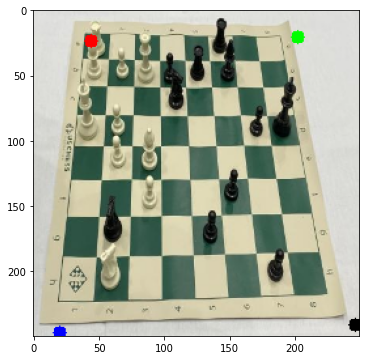

In [ ]:
plt.figure(figsize=(6,6))

tk = 5
cv2.circle(resized, tuple(np.multiply(coords[:2], [250,250]).astype(int)), tk, (255,0,0), -1)
cv2.circle(resized, tuple(np.multiply(coords[2:4], [250,250]).astype(int)), tk, (0,255,0), -1)
cv2.circle(resized, tuple(np.multiply(coords[4:6], [250,250]).astype(int)), tk, (0,0,255), -1)
cv2.circle(resized, tuple(np.multiply(coords[6:], [250,250]).astype(int)), tk, (0,0,0), -1)

plt.imshow(resized);

## **Resize to Orginal Image Size**

In [ ]:
test_img_path = r'/content/drive/MyDrive/KeyPoint/data/aug4/images/05ad7223827a29a8283f6c4b2490f52f_jpg_0.jpg'

img = cv2.imread(test_img_path)
h,w = img.shape[0],img.shape[1]
print(h,w)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb_copy = rgb_img.copy()
resized = cv2.resize(rgb_img, (250,250))

416 416


In [ ]:
yhat = model.predict(np.expand_dims(resized/255,0))
coords = yhat[0]

1/1 [==============================] - 1s 941ms/step


In [ ]:
coords

array([    0.17604,    0.097104,     0.81116,    0.085953,    0.083778,     0.98814,     0.98424,     0.96702], dtype=float32)

In [ ]:
# 'LU', 'RU' ,'LD' ,'RD'

In [ ]:
scaler = (w,h)
LU = np.multiply(coords[:2], scaler).astype(int)
RU = np.multiply(coords[2:4], scaler).astype(int)
LD = np.multiply(coords[4:6], scaler).astype(int)
RD = np.multiply(coords[6:], scaler).astype(int)

In [ ]:
print(LU)

[73 40]


In [ ]:
# plt.figure(figsize=(6,6))

# tk = 5
# scaler = [w,h]
# cv2.circle(resized, tuple(LU), tk, (255,0,0), -1)
# cv2.circle(resized, tuple(RU), tk, (0,255,0), -1)
# cv2.circle(resized, tuple(LD), tk, (0,0,255), -1)
# cv2.circle(resized, tuple(RD), tk, (0,0,0), -1)

# plt.imshow(resized);

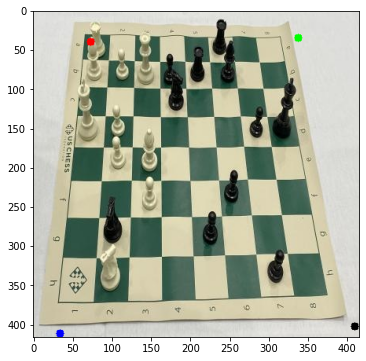

In [ ]:
plt.figure(figsize=(6,6))

tk = 5
scaler = [w,h]
cv2.circle(rgb_img, tuple(LU), tk, (255,0,0), -1)
cv2.circle(rgb_img, tuple(RU), tk, (0,255,0), -1)
cv2.circle(rgb_img, tuple(LD), tk, (0,0,255), -1)
cv2.circle(rgb_img, tuple(RD), tk, (0,0,0), -1)

plt.imshow(rgb_img);

In [ ]:
RD

array([409, 402])

In [ ]:
# modifiy points for testing
LU = [65,30]
RU = [315,33]
LD = [35,375]
RD = [380,365]

In [ ]:
pts1 = np.float32([LU, RU,LD,RD])
pts2 = np.float32([[0,0],[w,0],[0,h],[w,h]])

True

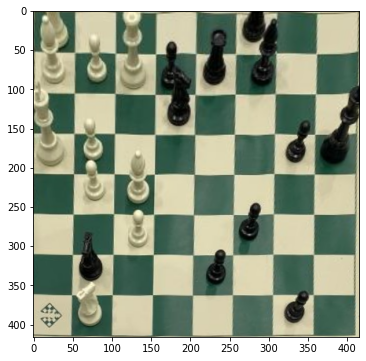

In [ ]:
plt.figure(figsize=(6,6))
matrix = cv2.getPerspectiveTransform(pts1,pts2)
output = cv2.warpPerspective(rgb_copy,matrix,(w,h))

plt.imshow(output);

save_dir = r'/content/drive/MyDrive/KeyPoint/save_wrap_images'
save_path = os.path.join(save_dir,'img_v1.jpg')
cv2.imwrite(save_path,output)

In [ ]:
test_img_path

'/content/drive/MyDrive/KeyPoint/data/aug4/images/05ad7223827a29a8283f6c4b2490f52f_jpg_0.jpg'

## **YOLO Object Detection**

In [ ]:
!pip install ultralytics

!yolo mode=checks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.9/107.7 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
yolo_path = r'/content/drive/MyDrive/Yolo_chess_project/YOLOv8/runs/detect/train3/weights/best.pt'

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

Ultralytics YOLOv8.0.6 🚀 Python-3.8.16 torch-1.13.0+cu116 CPU
Fusing layers... 
Model summary: 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 /content/drive/MyDrive/KeyPoint/save_wrap_images/img_v1.jpg: 416x416 3 bishops, 2 kings, 6 knights, 9 pawns, 1 queen, 1 rook, 295.7ms
Speed: 1.1ms pre-process, 295.7ms inference, 4.2ms postprocess per image at shape (1, 3, 416, 416)


{'det': array([[        368,          92,         416,         208,      0.8682,           1],
       [        120,         252,         151,         308,      0.8627,           3],
       [         52,         278,          90,         350,     0.85929,           2],
       [        324,         356,         356,         408,     0.85918,           3],
       [        221,         303,         253,         357,     0.85593,           3],
       [        324,         139,         359,         203,     0.85534,           3],
       [          0,          88,          42,         204,     0.85502,           1],
       [        263,         245,         295,         302,     0.85087,           3],
       [         50,         343,          90,         408,      0.8465,           2],
       [         61,         189,          94,         249,     0.84642,           3],
       [        169,          75,         207,         152,     0.84636,           2],
       [        117,         176,  

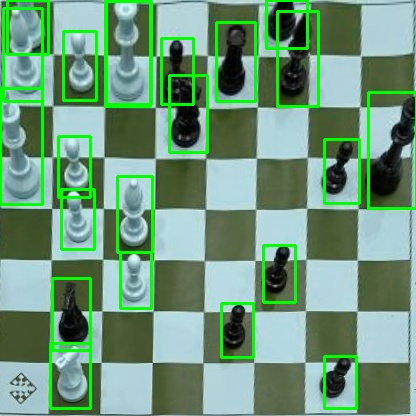

In [ ]:
from mmap import ACCESS_DEFAULT
model = YOLO(yolo_path)

#img_path = r'https://media.roboflow.com/notebooks/examples/dog.jpeg'
img_path = r'/content/drive/MyDrive/Yolo_chess_project/YOLOv8/datasets/Modified-Chess-Peaces-1/test/images/test_10_jpg.rf.44086d2f859d70828ece83be6da120ff.jpg'
img_path = save_path
results = model(source=img_path, conf=0.25,return_outputs=True)
#results = model.predict(source=', conf=0.25)

detection_result_array = []
img = cv2.imread(img_path)
for output in results:
  print(output)
  #np.save(r'test_array.npy', output)
  for detection in output['det']:
      x1, y1, x2, y2, accuracy, type_ = detection
      print(type_, accuracy)
      # print(x1,y1)
      # print(x2,y2)
      x1 = int(x1)
      y1 = int(y1)
      x2 = int(x2)
      y2 = int(y2)
      accuracy = int(accuracy*100)
      type_ = int(type_)

      detection_result_array.append((x1,y1,x2,y2,accuracy,type_))
      tk = 2
      cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), tk)

cv2_imshow(img)

In [ ]:
detection_result_array

[(368, 92, 416, 208, 0, 1),
 (120, 252, 151, 308, 0, 3),
 (52, 278, 90, 350, 0, 2),
 (324, 356, 356, 408, 0, 3),
 (221, 303, 253, 357, 0, 3),
 (324, 139, 359, 203, 0, 3),
 (0, 88, 42, 204, 0, 1),
 (263, 245, 295, 302, 0, 3),
 (50, 343, 90, 408, 0, 2),
 (61, 189, 94, 249, 0, 3),
 (169, 75, 207, 152, 0, 2),
 (117, 176, 152, 252, 0, 0),
 (63, 31, 96, 100, 0, 3),
 (58, 136, 90, 197, 0, 3),
 (266, 0, 307, 48, 0, 2),
 (161, 38, 193, 104, 0, 3),
 (216, 22, 255, 101, 0, 5),
 (105, 0, 150, 106, 0, 4),
 (3, 8, 42, 101, 0, 0),
 (277, 11, 318, 106, 0, 0),
 (7, 0, 48, 54, 0, 2),
 (106, 1, 151, 104, 0, 2)]

In [ ]:
import json

with open("file.json", 'w') as f:
    # indent=2 is not needed but makes the file human-readable 
    # if the data is nested
    json.dump(detection_result_array, f, indent=2) 